In [1]:
#import needed libraries 

import numpy as np 
import pandas as pd 
import re
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import PIL
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from scipy import stats

In [28]:
#inspect the data

winemag_130k = pd.read_csv("winemag-data-130k-v2.csv")
winemag_150k = pd.read_csv("winemag-data_first150k.csv")

print (winemag_150k.columns, len(winemag_150k.columns)) 


Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'variety', 'winery'],
      dtype='object') 11


In [29]:
#summarize winemag_150k and winemag_130k data

def wineinfo(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Uniques'] = df.nunique().values
    summary['Missing'] = df.isnull().sum().values    
    summary['Percent Missing'] = df.isnull().sum().values  * 100 / len(df)
  
    return summary

print (wineinfo(winemag_150k))
print (winemag_150k.columns)

print (wineinfo(winemag_130k))
print (winemag_130k.columns)

Dataset Shape: (150930, 11)
           Name   dtypes  Uniques  Missing  Percent Missing
0    Unnamed: 0    int64   150930        0         0.000000
1       country   object       48        5         0.003313
2   description   object    97821        0         0.000000
3   designation   object    30621    45735        30.302127
4        points    int64       21        0         0.000000
5         price  float64      357    13695         9.073743
6      province   object      455        5         0.003313
7      region_1   object     1236    25060        16.603724
8      region_2   object       18    89977        59.615053
9       variety   object      632        0         0.000000
10       winery   object    14810        0         0.000000
Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')
Dataset Shape: (129971, 14)
                     Name   dtypes  Uniques  Missing  Pe

In [30]:
#better understand points column for the datasets


print (winemag_150k['points'].min())
print (winemag_150k['points'].max())
       

print (winemag_130k['points'].min())
print (winemag_130k['points'].max())

80
100
80
100


In [7]:
#merge the data into one dataframe using an outerjoin

winereviews_df = winemag_150k.merge(winemag_130k, how='outer')

print (winereviews_df.columns)
print (winereviews_df.describe(include='all',))


Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')
           Unnamed: 0 country  \
count   280900.000000  280832   
unique            NaN      50   
top               NaN      US   
freq              NaN  116901   
mean     70615.787309     NaN   
std      41214.430255     NaN   
min          0.000000     NaN   
25%      35112.000000     NaN   
50%      70225.000000     NaN   
75%     105337.250000     NaN   
max     150929.000000     NaN   

                                              description designation  \
count                                              280900      197700   
unique                                             169430       47239   
top     A little bit funky and unsettled when you pop ...     Reserve   
freq                                                    7        4761   
mean          

In [31]:
# check basic statistic data, percent missing value data and thier column types.
def wineinfo(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Uniques'] = df.nunique().values
    summary['Missing'] = df.isnull().sum().values    
    summary['Percent Missing'] = df.isnull().sum().values  * 100 / len(df)
  
    return summary

print (wineinfo(winereviews_df))
print (winereviews_df.columns)

Dataset Shape: (280900, 15)
                     Name   dtypes  Uniques  Missing  Percent Missing
0              Unnamed: 0    int64   150930        0         0.000000
1                 country   object       50       68         0.024208
2             description   object   169430        0         0.000000
3             designation   object    47239    83200        29.619082
4                  points    int64       21        0         0.000000
5                   price  float64      415    22691         8.077964
6                province   object      490       68         0.024208
7                region_1   object     1332    46307        16.485226
8                region_2   object       18   169436        60.318975
9             taster_name   object       19   177173        63.073336
10  taster_twitter_handle   object       15   182142        64.842293
11                  title   object   118840   150929        53.730509
12                variety   object      756        1         0

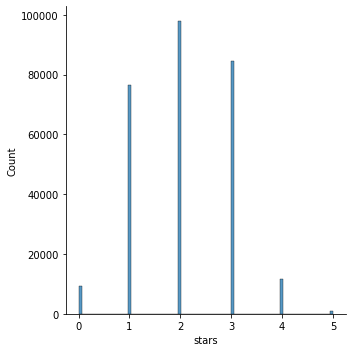

In [9]:
#change points from 80-100 to a 5 point system

def stars(points):
    if points in list(range(80,83)):
        return 0
    elif points in list(range(83,87)):
        return 1
    elif points in list(range(87,90)):
        return 2
    elif points in list(range(90,94)):
        return 3
    elif points in list(range(94,97)):
        return 4
    else:
        return 5

winereviews_df["stars"] = winereviews_df["points"].apply(stars)
sns.displot(winereviews_df, x="stars")

In [32]:
#check summary of merged data

print (wineinfo(winereviews_df))
print (winereviews_df.columns)

Dataset Shape: (280900, 15)
                     Name   dtypes  Uniques  Missing  Percent Missing
0              Unnamed: 0    int64   150930        0         0.000000
1                 country   object       50       68         0.024208
2             description   object   169430        0         0.000000
3             designation   object    47239    83200        29.619082
4                  points    int64       21        0         0.000000
5                   price  float64      415    22691         8.077964
6                province   object      490       68         0.024208
7                region_1   object     1332    46307        16.485226
8                region_2   object       18   169436        60.318975
9             taster_name   object       19   177173        63.073336
10  taster_twitter_handle   object       15   182142        64.842293
11                  title   object   118840   150929        53.730509
12                variety   object      756        1         0

<AxesSubplot:xlabel='variety', ylabel='points'>

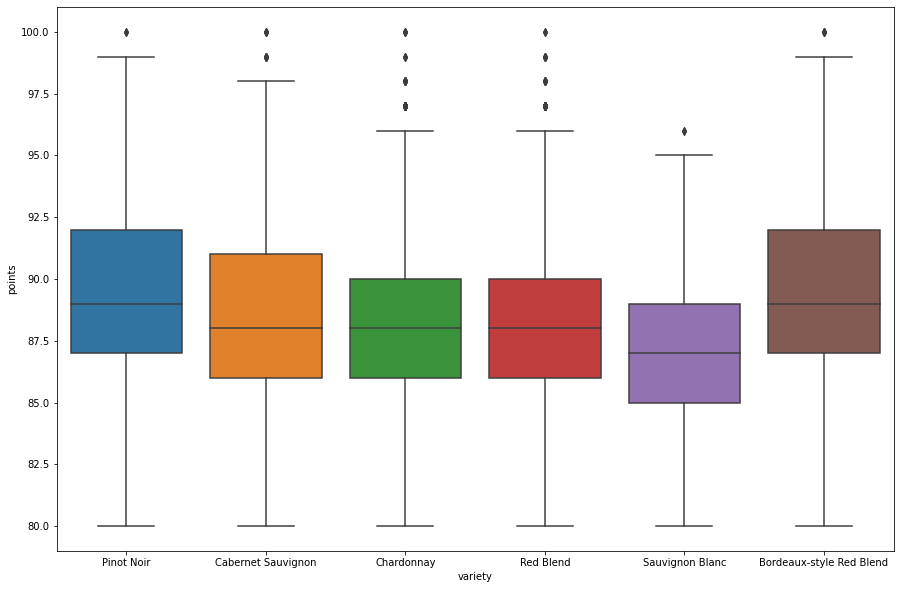

In [11]:
#visualize points ratings in relation to variety of wine
wines= winereviews_df[winereviews_df.variety.isin(winereviews_df.variety.value_counts().head(6).index)]

plt.figure(figsize = (15,10))
sns.boxplot(
    x = 'variety',
    y = 'points',
    data = wines
)


<AxesSubplot:xlabel='country', ylabel='points'>

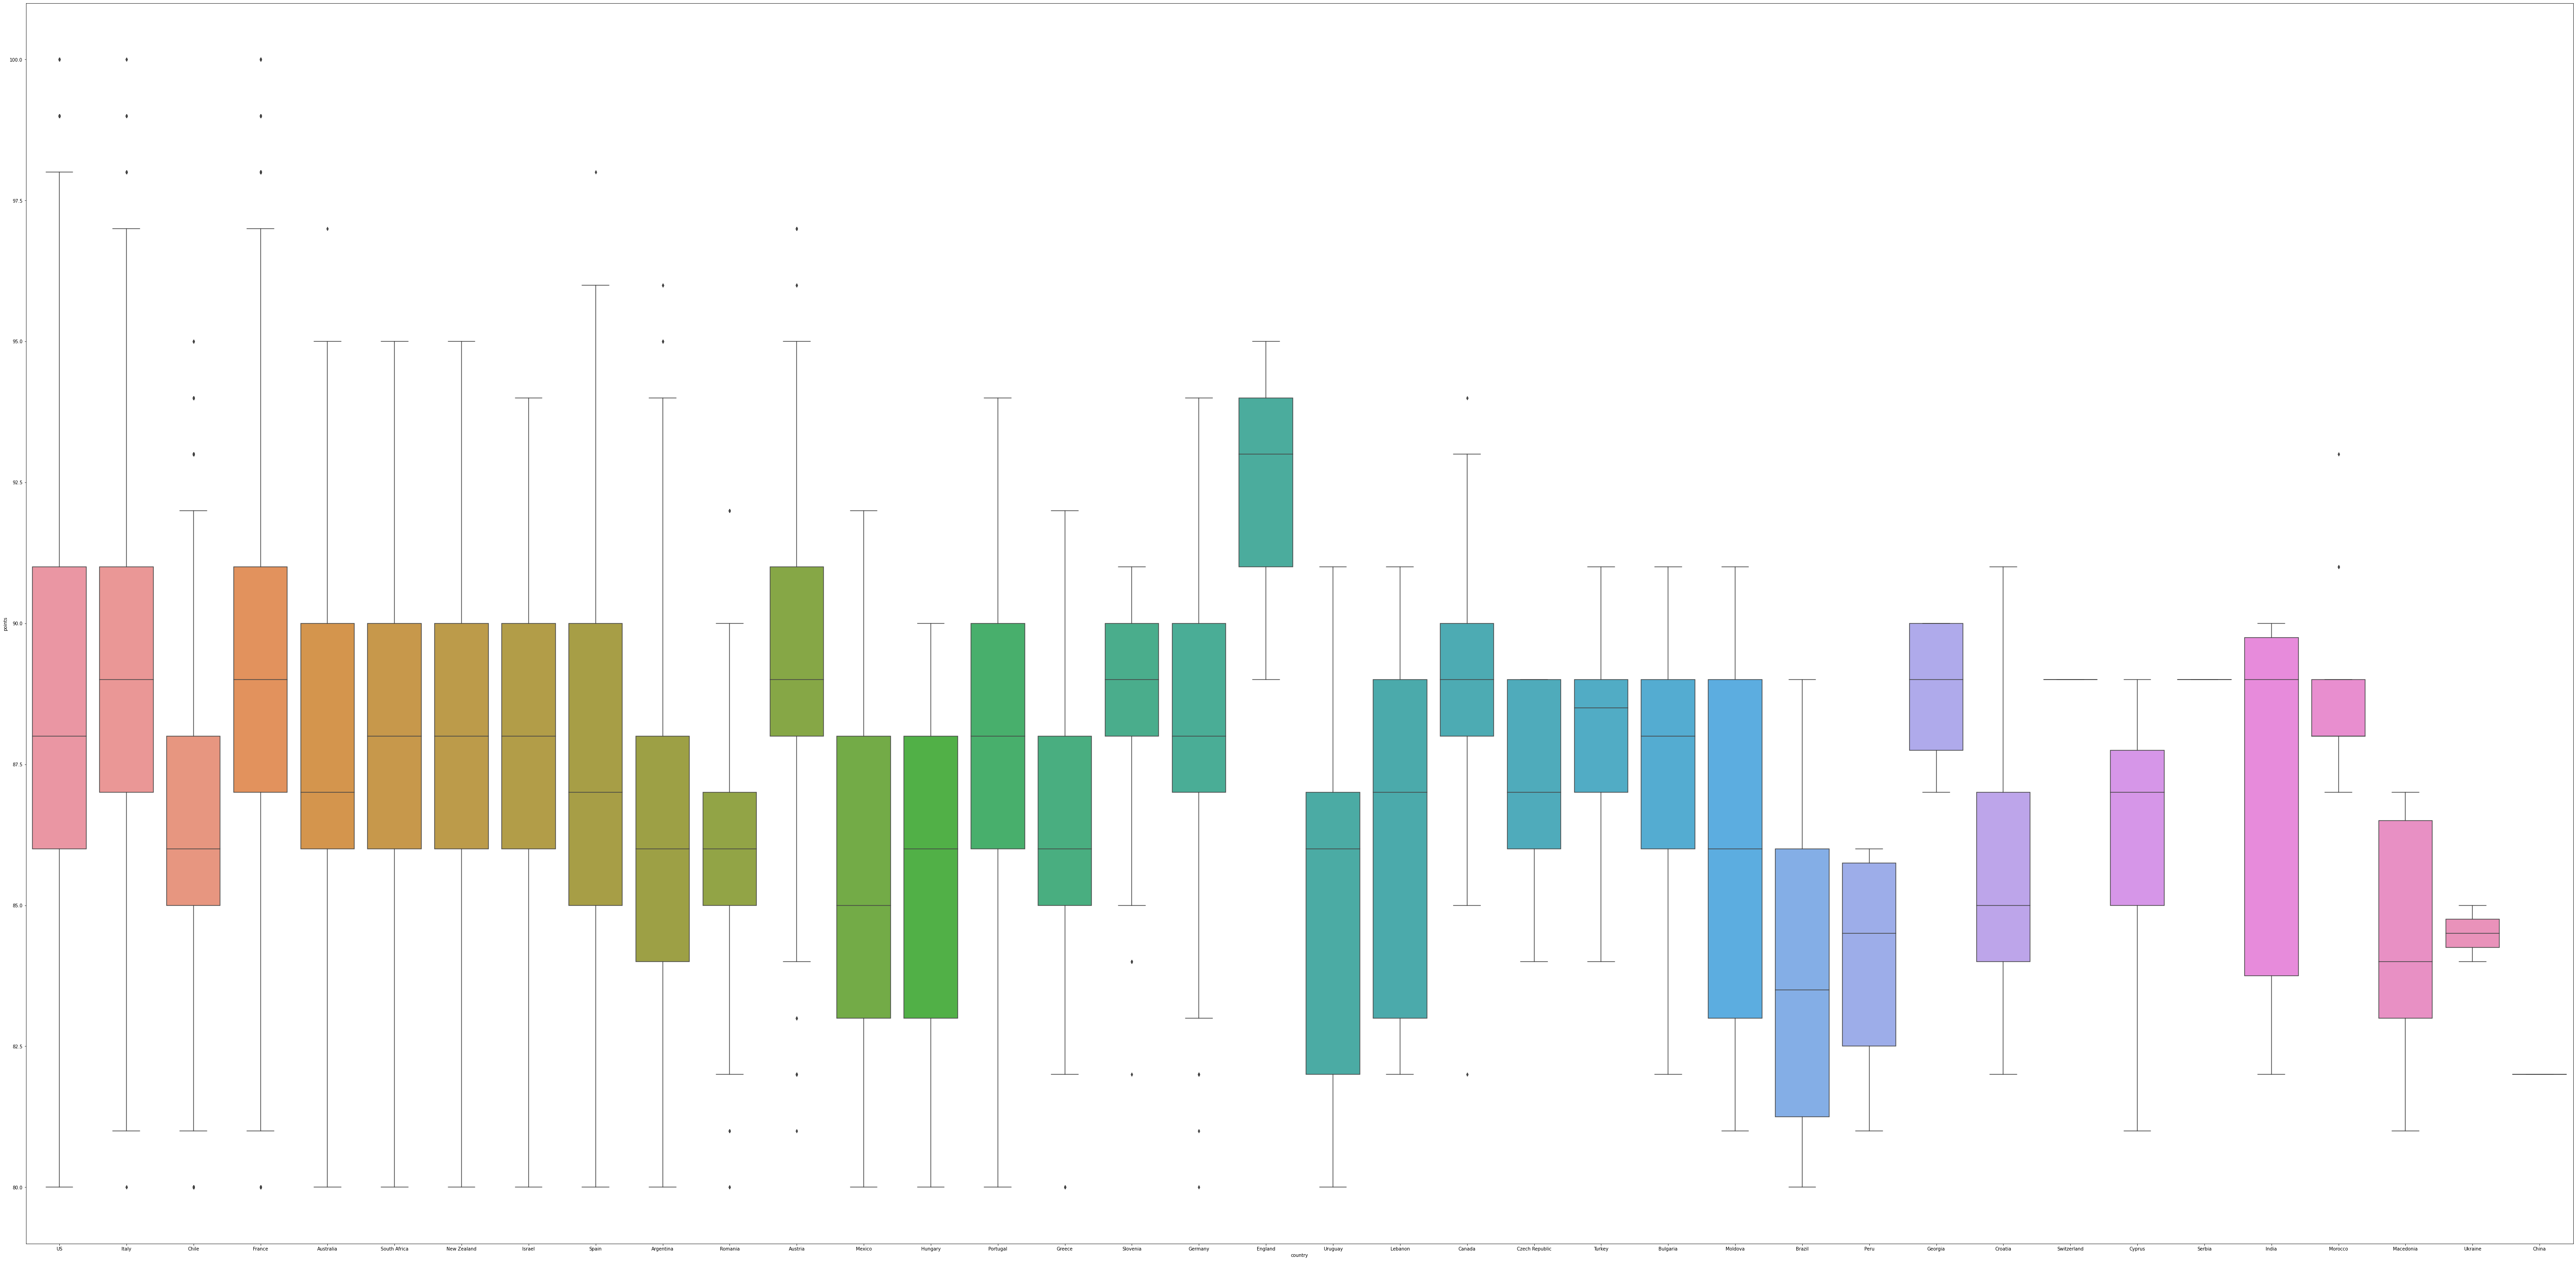

In [33]:
# point with country boxplot
plt.figure(figsize = (100,50))

sns.boxplot(
    x = 'country',
    y = 'points',
    data = wines
)

In [13]:
#how many unique varieties of wine in df

unique_variety = winereviews_df['variety'].unique()
print(unique_variety)

['White Blend' 'Portuguese Red' 'Pinot Gris' 'Riesling' 'Pinot Noir'
 'Tempranillo-Merlot' 'Frappato' 'Gewürztraminer' 'Cabernet Sauvignon'
 'Nerello Mascalese' 'Chardonnay' 'Malbec' 'Tempranillo Blend' 'Meritage'
 'Red Blend' 'Merlot' "Nero d'Avola" 'Chenin Blanc' 'Gamay'
 'Sauvignon Blanc' 'Viognier-Chardonnay' 'Primitivo' 'Catarratto'
 'Inzolia' 'Petit Verdot' 'Monica' 'Bordeaux-style White Blend' 'Grillo'
 'Sangiovese' 'Cabernet Franc' 'Champagne Blend'
 'Bordeaux-style Red Blend' 'Aglianico' 'Petite Sirah' 'Touriga Nacional'
 'Carmenère' 'Albariño' 'Petit Manseng' 'Rosé' 'Zinfandel' 'Vernaccia'
 'Rosato' 'Grüner Veltliner' 'Viognier' 'Vermentino' 'Grenache Blanc'
 'Syrah' 'Nebbiolo' 'Shiraz-Cabernet Sauvignon' 'Pinot Blanc'
 'Alsace white blend' 'Barbera' 'Rhône-style Red Blend' 'Portuguese White'
 'Graciano' 'Tannat-Cabernet' 'Sauvignon' 'Sangiovese Grosso' 'Torrontés'
 'Prugnolo Gentile' 'G-S-M' 'Verdejo' 'Fumé Blanc' 'Furmint'
 'Pinot Bianco' 'Bonarda' 'Shiraz' 'Montepulciano' 

           Unnamed: 0     points      price     stars
country                                              
England  67970.843373  91.722892  51.246753  3.084337
Austria  67777.658232  89.707591  30.964597  2.499688
Germany  65643.138402  89.200996  40.551824  2.367988
India    44658.529412  89.000000  13.588235  2.411765
France   67781.831743  88.884603  43.174631  2.258463


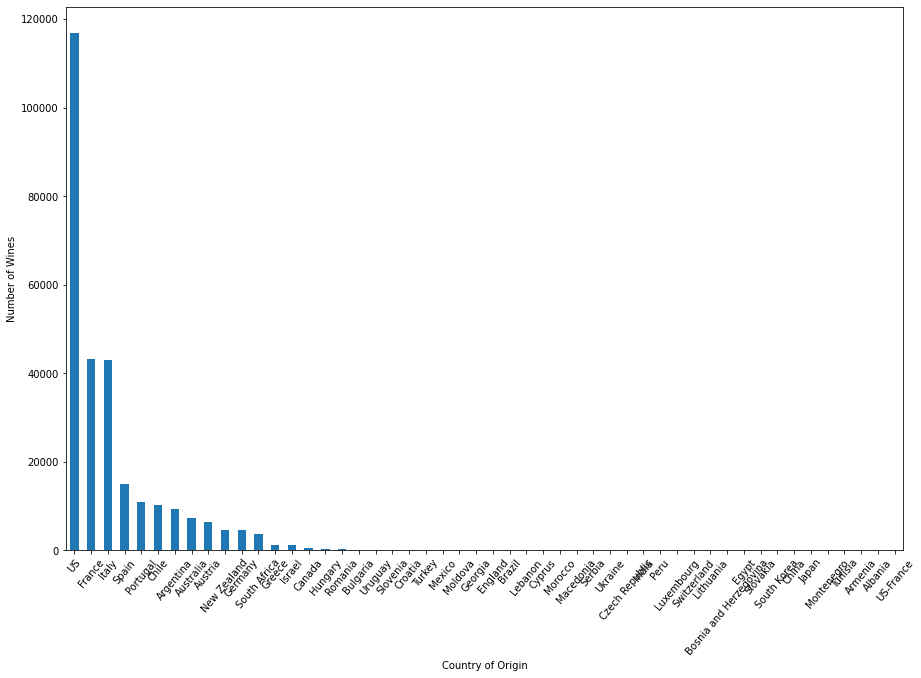

In [34]:
#groupby by country
country = winereviews_df.groupby("country")

#summary of countries
country.describe().head()

#top 5 highest average points among all 44 countries
print (country.mean().sort_values(by="points",ascending=False).head())

#plot of countries with highest average points
plt.figure(figsize=(15,10))
country.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Country of Origin")
plt.ylabel("Number of Wines")
plt.show()

/tmp/ipykernel_518/1262885537.py:4: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  country.max().sort_values(by="points",ascending=False)["points"].plot.bar()


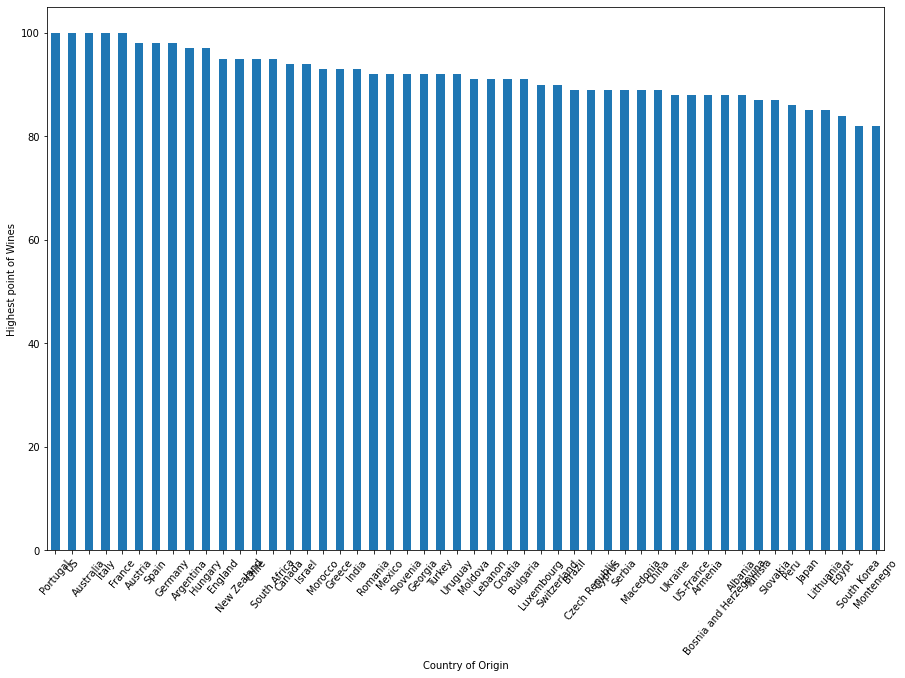

In [35]:
#quantity or quality

plt.figure(figsize=(15,10))
country.max().sort_values(by="points",ascending=False)["points"].plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Country of Origin")
plt.ylabel("Highest point of Wines")
plt.show()

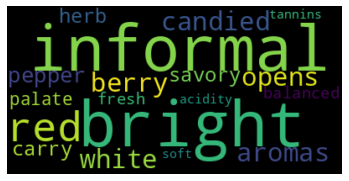

In [15]:
#wordcloud tutorial 

?WordCloud

# Start with one review:
text = winereviews_df.description[6]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()



There are 68091509 words in the combination of all review.


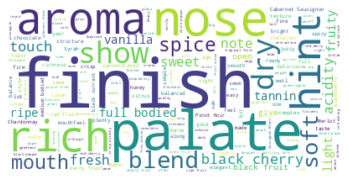

In [35]:
#wordcloud tutorial continued 

#combine all reviews to see one large wordcloud description for all reviews
text = " ".join(review for review in winereviews_df.description)
print ("There are {} words in the combination of all review.".format(len(text)))

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["drink", "now", "wine", "flavor", "flavors"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [17]:
#join reviews for wine sorted by country

# Join all reviews of each country:
usa = " ".join(review for review in winereviews_df[winereviews_df["country"]=="US"].description)
fra = " ".join(review for review in winereviews_df[winereviews_df["country"]=="France"].description)
ita = " ".join(review for review in winereviews_df[winereviews_df["country"]=="Italy"].description)
spa = " ".join(review for review in winereviews_df[winereviews_df["country"]=="Spain"].description)
por = " ".join(review for review in winereviews_df[winereviews_df["country"]=="Portugal"].description)

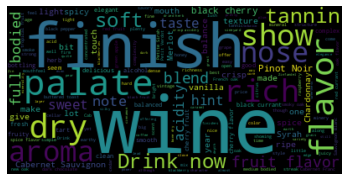

In [24]:
# Start with one country
text = usa

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["drink", "now", "wine", "flavor", "flavors"])

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [19]:
#join reviews for wine sorted by top variety

pinot_noir = " ".join(review for review in winereviews_df[winereviews_df["variety"]=="Pinot Noir"].description)
chardonnay = " ".join(review for review in winereviews_df[winereviews_df["variety"]=="Chardonnay"].description)
cabernet_sauvignon = " ".join(review for review in winereviews_df[winereviews_df["variety"]=="Cabernet Sauvignon"].description)
red_blend = " ".join(review for review in winereviews_df[winereviews_df["variety"]=="Red Blend"].description)
bordeaux_style_red_blend = " ".join(review for review in winereviews_df[winereviews_df["variety"]=="Bordeaux-style Red"].description)

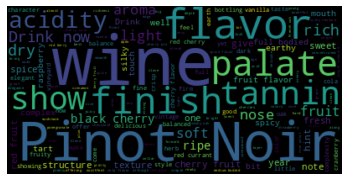

In [27]:
# Start with one review:
text = pinot_noir

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["drink", "now", "wine", "flavor", "flavors"])

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [41]:
merged = winemag_150k.merge(winemag_130k, how='left')
merged.duplicated(subset=None,
                    keep='first'
                    )
print (merged.columns)

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'variety', 'winery',
       'taster_name', 'taster_twitter_handle', 'title'],
      dtype='object')
